# Prosper Loan Amount and features which effect the size

## Overview

For this investigation I looked at the prosper loan data set and what characteristic effected the original loan amount size. The main focus on this was the borrower's APR/rate, estimated loss/return, and occupations.

## Dataset Overview

The data was provided by Prosper and contained 113,937 records on loan information. There were 81 features in the dataset however I reduced the number of features investigated down to 13 features ultimately being investigated.

## Distribution of Original Loan Amount

The original loan amount provided in the dataset ranged between $\$$1,000 and $\$$35,000 with a mean of $\$$8337.01 and median of $\$$6,500.00. When viewing the distribution on a logarithmic scale, we see a mulitmodal shape of the loan amount with peaks in $\$$5k increments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

columns_include = ['ListingKey','ListingNumber','Term','LoanStatus','ClosedDate',
                   'BorrowerAPR','BorrowerRate','EstimatedLoss','EstimatedReturn','ProsperScore',
                   'ListingCategory (numeric)','Occupation','IsBorrowerHomeowner','TotalProsperLoans',
                   'LoanNumber','LoanOriginalAmount','LoanOriginationDate','Investors']


loan_data = pd.read_csv('prosperLoanData.csv', usecols=columns_include)

loan_data.loc[loan_data['ProsperScore'] == 11, 'ProsperScore'] = 10

occupation_mapping = {
    'Other': 'Other',
    'Professional': 'Professional',
    'Computer Programmer': 'Professional',
    'Executive': 'Professional',
    'Teacher': 'Skilled Labor',
    'Administrative Assistant': 'Skilled Labor',
    'Analyst': 'Professional',
    'Sales - Commission': 'Skilled Labor',
    'Accountant/CPA': 'Professional',
    'Clerical': 'Skilled Labor',
    'Sales - Retail': 'Unskilled Labor',
    'Skilled Labor': 'Skilled Labor',
    'Retail Management': 'Skilled Labor',
    'Nurse (RN)': 'Skilled Labor',
    'Construction': 'Skilled Labor',
    'Truck Driver': 'Skilled Labor',
    'Laborer': 'Unskilled Labor',
    'Police Officer/Correction Officer': 'Skilled Labor',
    'Civil Service': 'Skilled Labor',
    'Engineer - Mechanical': 'Professional',
    'Military Enlisted': 'Skilled Labor',
    'Food Service Management': 'Skilled Labor',
    'Engineer - Electrical': 'Professional',
    'Food Service': 'Skilled Labor',
    'Medical Technician': 'Skilled Labor',
    'Attorney': 'Professional',
    'Tradesman - Mechanic': 'Skilled Labor',
    'Social Worker': 'Skilled Labor',
    'Postal Service': 'Skilled Labor',
    'Professor': 'Professional',
    'Realtor': 'Professional',
    'Doctor': 'Professional',
    'Nurse (LPN)': 'Skilled Labor',
    "Nurse's Aide": 'Skilled Labor',
    'Tradesman - Electrician': 'Skilled Labor',
    'Waiter/Waitress': 'Unskilled Labor',
    'Fireman': 'Skilled Labor',
    'Scientist': 'Professional',
    'Military Officer': 'Skilled Labor',
    'Bus Driver': 'Skilled Labor',
    'Principal': 'Professional',
    "Teacher's Aide": 'Skilled Labor',
    'Pharmacist': 'Professional',
    'Student - College Graduate Student': 'Student',
    'Landscaping': 'Unskilled Labor',
    'Engineer - Chemical': 'Professional',
    'Investor': 'Professional',
    'Architect': 'Professional',
    'Pilot - Private/Commercial': 'Professional',
    'Clergy': 'Skilled Labor',
    'Student - College Senior': 'Student',
    'Car Dealer': 'Skilled Labor',
    'Chemist': 'Professional',
    'Psychologist': 'Professional',
    'Biologist': 'Professional',
    'Religious': 'Skilled Labor',
    'Flight Attendant': 'Skilled Labor',
    'Tradesman - Carpenter': 'Skilled Labor',
    'Homemaker': 'Unskilled Labor',
    'Student - College Junior': 'Student',
    'Tradesman - Plumber': 'Skilled Labor',
    'Student - College Sophomore': 'Student',
    'Dentist': 'Professional',
    'Student - College Freshman': 'Student',
    'Student - Community College': 'Student',
    'Judge': 'Professional',
    'Student - Technical School': 'Student'  
}

loan_data_cat = loan_data.replace({'Occupation': occupation_mapping}, inplace=False)

#we will go ahead and add this to our main dataset as a new column

loan_data["Occupation_Bucketed"] = loan_data_cat['Occupation']

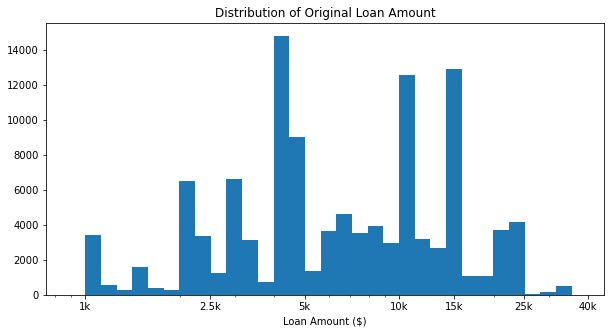

In [2]:
log_binsize = .05

bins = 10 ** np.arange(2.5, np.log10(loan_data['LoanOriginalAmount'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins);
plt.xlim(750, 45000)
plt.xscale('log');
plt.xticks([1000, 2500, 5000, 10000, 15000, 25000, 40000],
           ['1k', '2.5k', '5k', '10k', '15k', '25k', '40k']);
plt.xlabel('Loan Amount ($)');
plt.title('Distribution of Original Loan Amount');

## Distribution of Prosper Score

Prosper score is a custom risk score provided for each loan based on historical data. This score is 1 through 10 with a 10 being the best possible score. The prosper score has a roughly normal distribution in this dataset.

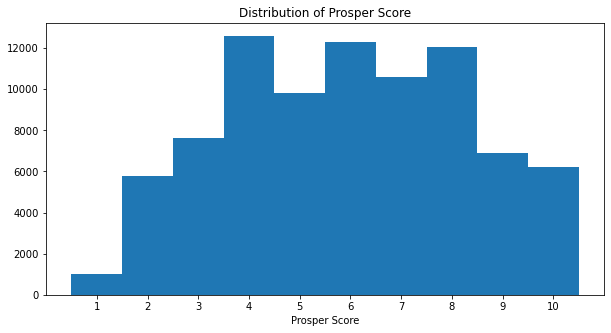

In [3]:
plt.figure(figsize=[10, 5])
score = loan_data['ProsperScore'].value_counts()
plt.bar(score.index, score.values, width=1, align='center')
plt.xticks(range(1, 11));
plt.xlabel('Prosper Score');
plt.title('Distribution of Prosper Score');

## Original Loan Amount vs Estimated Loss

Looking at a scatter plot of the logarithmic scaled original loan amount to estimated loss we see a slightly negative correlation between the two features.

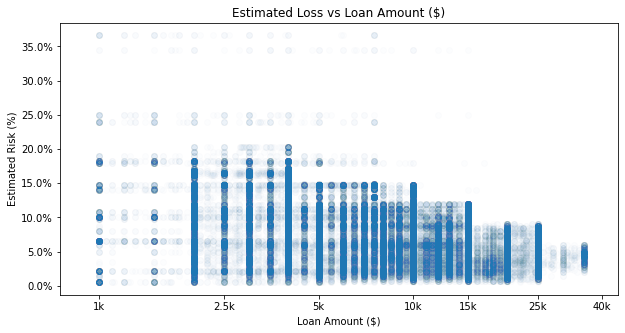

In [4]:
loan_data['LoanAmountLog'] = np.log10(loan_data['LoanOriginalAmount'])

plt.figure(figsize=[10, 5])
plt.scatter(data = loan_data, x = 'LoanAmountLog', y='EstimatedLoss', alpha=.01);
plt.xlim(np.log10(750), np.log10(45000))
plt.xticks(np.log10([1000, 2500, 5000, 10000, 15000, 25000, 40000]),
           ['1k', '2.5k', '5k', '10k', '15k', '25k', '40k']);
plt.xlabel('Loan Amount ($)');
plt.ylabel('Estimated Risk (%)');
y_vals = [0.0, .05, .1, .15, .2, .25, .3, .35]
plt.yticks(y_vals, [f'{i*100}%' for i in y_vals]);
plt.title('Estimated Loss vs Loan Amount ($)');

## Original Loan Amount and Estimated Loss by Occupation

Further we see the relationship in the different Occupation types. We see that professional occupations are related to the larger loan amounts and lower estimated loss, where as unskilled labor or students are related to lower loan amounts and higher estimated loss. For example professionals have a mean loan amount of approximately $\$$8,000 and estimated loss of 6% and the students have a mean of approximately $2,500 and 10% loss.

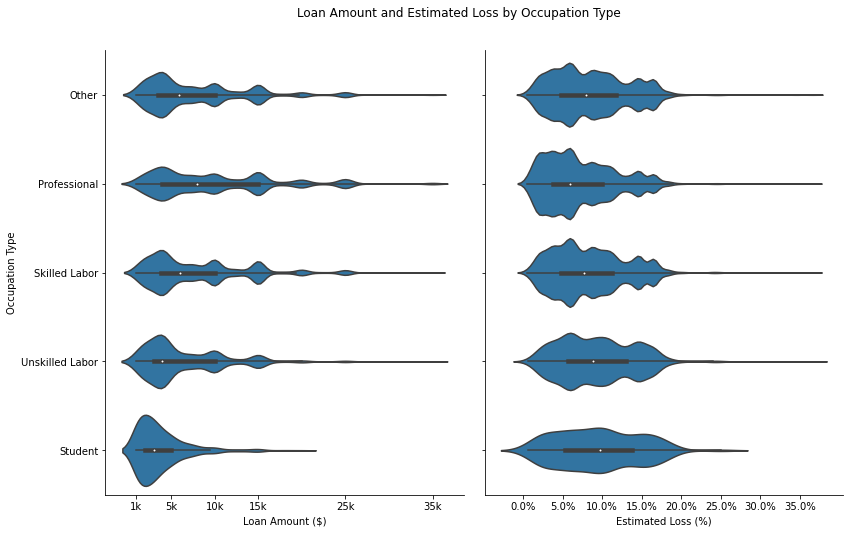

In [5]:
g = sb.PairGrid(data=loan_data, x_vars = ['LoanOriginalAmount', 'EstimatedLoss'],
               y_vars = ['Occupation_Bucketed'], height=7.5, aspect=.75);

g.map(sb.violinplot, color=sb.color_palette()[0]);

g.axes[0,0].xaxis.set_label_text('Loan Amount ($)');
g.axes[0,1].xaxis.set_label_text('Estimated Loss (%)');
g.axes[0,0].yaxis.set_label_text('Occupation Type');
g.axes[0,0].set(xticks=[1000, 5000, 10000, 15000, 25000, 35000], xticklabels=['1k', '5k', '10k', '15k', '25k', '35k']);
g.axes[0,1].set(xticks=y_vals, xticklabels=[f'{i*100}%' for i in y_vals]);
g.fig.subplots_adjust(top=.9);
g.fig.suptitle('Loan Amount and Estimated Loss by Occupation Type');

## Prosper Score and Loan Amount across Occupation Types by select Loan Status

Finally I looked at how prosper scores and loan amount differed by occupation types for 3 select loan statuses (Completed, Defaulted, Charged Off). From this we see again that professional occupation types have a larger original loan amounts than the other occupations and this increases as the prosper score increases. We also see that for professional occupation type the completed loans typically have a larger loan amount than the other 2 non-optimal status until you get to a score of 7. This different from the other occupations types as for the most part regardless of the prosper score a large loan is associated with the defaulted or charged off status.

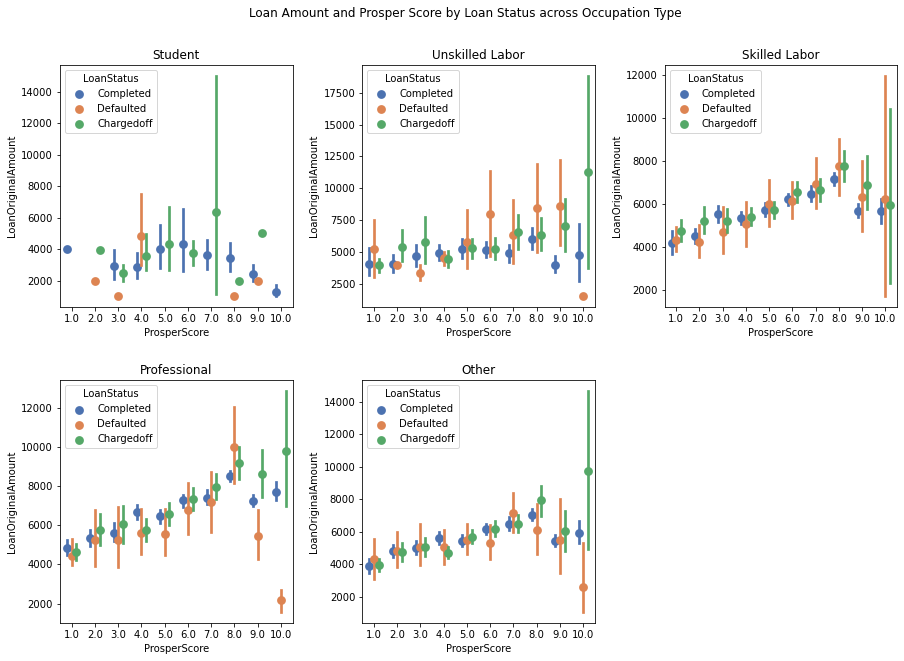

In [6]:
status_filtered = loan_data.query('LoanStatus in ["Completed", "Defaulted", "Chargedoff"]')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


for idx, occupation in enumerate(['Student', 'Unskilled Labor', 'Skilled Labor', 'Professional', 'Other']):
    data = status_filtered.query(f'Occupation_Bucketed == "{occupation}"')
    ax = axes[idx // 3, idx % 3]
    sb.pointplot(data=data, x='ProsperScore', y='LoanOriginalAmount', hue='LoanStatus', dodge=.4,
                                        hue_order=['Completed', 'Defaulted', 'Chargedoff'],
                                        linestyles='', palette='deep', ax=ax)
    ax.title.set_text(occupation);

    
fig.subplots_adjust(wspace=.3, hspace=.3)
fig.delaxes(axes[1, 2]);

fig.subplots_adjust(top=.9);
fig.suptitle('Loan Amount and Prosper Score by Loan Status across Occupation Type');